In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.DataFrame
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_df = "mouse_drug_data.csv"
clinical_trial_data_df = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv("mouse_drug_data.csv")
clinical_trial_df = pd.read_csv("clinicaltrial_data.csv")

# wrestlers_2013_df = pd.read_csv(wrestling_2013)

# Combine the data into a single dataset
combined_drug_df = pd.merge(mouse_drug_df, clinical_trial_df, on=["Mouse ID"])
# Display the data table for preview
combined_drug_df.head()


# combined_drug_df["Drug"].value_counts()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# drop unessesary drugs...    keep Capomulin, Infubinol, Ketapril, and Placebo
new_drug_df = combined_drug_df["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"])
drug_df = combined_drug_df[new_drug_df]
drug_df

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint   
tumor_volume_grouped_df = drug_df.groupby(["Drug", "Timepoint"]).mean()
mean_df = tumor_volume_grouped_df.reset_index()
mean_df

# # Convert to DataFrame
# tumor_volume_group_df = pd.DataFrame(tumor_volume_grouped_df["Tumor Volume (mm3)"].mean().reset_index())
# tumor_volume_group_df.head()

# rename columns
mean_df_new = mean_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Mean",
                                                  "Metastatic Sites":"Metastatic Mean"
                                                               })
mean_df_new

,Drug,Timepoint,Tumor Volume Mean,Metastatic Mean
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174
5,Capomulin,25,39.939528,0.818182
6,Capomulin,30,38.769339,1.090909
7,Capomulin,35,37.816839,1.181818
8,Capomulin,40,36.958001,1.380952
9,Capomulin,45,36.236114,1.476190


In [4]:
volume_mean_df_new = mean_df_new.pivot(index = "Timepoint" , columns='Drug', values=['Tumor Volume Mean']).reset_index(inplace = False)
volume_mean_df_new


# data.set_index("last_name", inplace=True)

Timepoint Tumor Volume Mean                                 
Drug                   Capomulin  Infubinol   Ketapril    Placebo
0            0         45.000000  45.000000  45.000000  45.000000
1            5         44.266086  47.062001  47.389175  47.125589
2           10         43.084291  49.403909  49.582269  49.423329
3           15         42.064317  51.296397  52.399974  51.359742
4           20         40.716325  53.197691  54.920935  54.364417
5           25         39.939528  55.715252  57.678982  57.482574
6           30         38.769339  58.299397  60.994507  59.809063
7           35         37.816839  60.742461  63.371686  62.420615
8           40         36.958001  63.162824  66.068580  65.052675
9           45         36.236114  65.755562  70.662958  68.084082

In [5]:
# Generate the Plot (with Error B
# ax.errorbar(np.arange(0, len(means)), means, yerr=sems, fmt="o")ars)

# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
#(x[:4], y[:4], s=10, c='b', marker="s", label='first')

# timepoint = volume_mean_df_new.iloc[Drug]
x = volume_mean_df_new['Timepoint'] 
y = volume_mean_df_new['Capomulin']


plt.scatter(x, y, s=10, c='b', marker='o')
plt.title("Tumor Volume Change Over Time")
plt.xlabel("TimePoint (Days)")
plt.ylabel("Tumor Volume")
plt.show()


# x = volume_mean_df_new['Timepoint'], y = volume_mean_df_new['Infubinol']
# x = volume_mean_df_new['Timepoint'], y = volume_mean_df_new['Ketapril']
# x = volume_mean_df_new['Timepoint'], y = volume_mean_df_new['Placebo']

# Save the Figure




KeyError: 'Capomulin'

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint


standard_error_grouped_df = drug_df.groupby(["Drug", "Timepoint"])
standard_error_grouped_df["Tumor Volume (mm3)"].sem()



# Convert to DataFrame
standard_error_df = pd.DataFrame(standard_error_grouped_df["Tumor Volume (mm3)"].sem().reset_index())
standard_error_df

# rename columbs
standard_error_df = standard_error_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Error"})
standard_error_df.head()



,Drug,Timepoint,Tumor Volume Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
standard_error_df_new = standard_error_df.pivot(index="Timepoint", columns='Drug', values=['Tumor Volume Error'])
standard_error_df_new.reset_index()


Timepoint Tumor Volume Error                              
Drug                    Capomulin Infubinol  Ketapril   Placebo
0            0           0.000000  0.000000  0.000000  0.000000
1            5           0.448593  0.235102  0.264819  0.218091
2           10           0.702684  0.282346  0.357421  0.402064
3           15           0.838617  0.357705  0.580268  0.614461
4           20           0.909731  0.476210  0.726484  0.839609
5           25           0.881642  0.550315  0.755413  1.034872
6           30           0.934460  0.631061  0.934121  1.218231
7           35           1.052241  0.984155  1.127867  1.287481
8           40           1.223608  1.055220  1.158449  1.370634
9           45           1.223977  1.144427  1.453186  1.351726

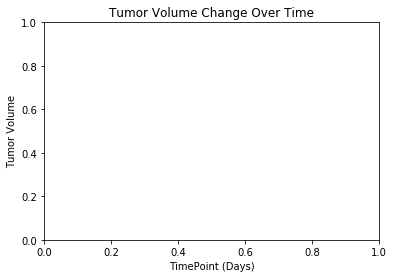

KeyError: 'Capomulin'

In [8]:
# Generate the Plot (with Error B
# ax.errorbar(np.arange(0, len(means)), means, yerr=sems, fmt="o")ars)

# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
# 

# x = volume_mean_df['Timepoint']
# y = volume_mean_df['Capomulin']
# y_1 = volume_mean_df['Infubinol']
# y_2 = volume_mean_df['Ketapril']
# y_3 = volume_mean_df['Placebo']


plt.title("Tumor Volume Change Over Time")
plt.xlabel("TimePoint (Days)")
plt.ylabel("Tumor Volume")
plt.show()

x = volume_mean_df_new['Timepoint'], y = volume_mean_df_new['Capomulin']
# x = volume_mean_df_new['Timepoint'], y = volume_mean_df_new['Infubinol']
# x = volume_mean_df_new['Timepoint'], y = volume_mean_df_new['Ketapril']
# x = volume_mean_df_new['Timepoint'], y = volume_mean_df_new['Placebo']

# Save the Figure



![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_df = drug_df.groupby(["Drug", "Timepoint"])
mean_met_df["Metastatic Sites"].mean()                              
# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_met_df["Metastatic Sites"].mean().reset_index())
mean_met_df

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_df = drug_df.groupby(["Timepoint", "Drug"])
sem_met_df["Metastatic Sites"].sem()                              
# Convert to DataFrame
sem_met_df = pd.DataFrame(sem_met_df["Metastatic Sites"].sem().reset_index())
sem_met_df.head(5)



,Timepoint,Drug,Metastatic Sites
0,0,Capomulin,0.000000
1,0,Infubinol,0.000000
2,0,Ketapril,0.000000
3,0,Placebo,0.000000
4,5,Capomulin,0.074833


In [11]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_sites_sem_df_new = sem_met_df.pivot(index='Timepoint', columns="Drug", values=['Metastatic Sites'])
metastatic_sites_sem_df_new
# Preview that Reformatting worked


Metastatic Sites                              
Drug             Capomulin Infubinol  Ketapril   Placebo
Timepoint                                               
0                 0.000000  0.000000  0.000000  0.000000
5                 0.074833  0.091652  0.098100  0.100947
10                0.125433  0.159364  0.142018  0.115261
15                0.132048  0.194015  0.191381  0.190221
20                0.161621  0.234801  0.236680  0.234064
25                0.181818  0.265753  0.288275  0.263888
30                0.172944  0.227823  0.347467  0.300264
35                0.169496  0.224733  0.361418  0.341412
40                0.175610  0.314466  0.315725  0.297294
45                0.202591  0.309320  0.278722  0.304240

In [12]:
mean_met_df = drug_df.groupby(["Timepoint", "Drug"])
mean_met_df["Metastatic Sites"].mean()                              
# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_met_df["Metastatic Sites"].mean().reset_index())
standard_error_df





mean_met_df_new = mean_met_df.pivot(index='Timepoint', columns="Drug", values=['Metastatic Sites'])
mean_met_df_new

Metastatic Sites                              
Drug             Capomulin Infubinol  Ketapril   Placebo
Timepoint                                               
0                 0.000000  0.000000  0.000000  0.000000
5                 0.160000  0.280000  0.304348  0.375000
10                0.320000  0.666667  0.590909  0.833333
15                0.375000  0.904762  0.842105  1.250000
20                0.652174  1.050000  1.210526  1.526316
25                0.818182  1.277778  1.631579  1.941176
30                1.090909  1.588235  2.055556  2.266667
35                1.181818  1.666667  2.294118  2.642857
40                1.380952  2.100000  2.733333  3.166667
45                1.476190  2.111111  3.363636  3.272727

In [13]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)